<a href="https://colab.research.google.com/github/Fazlibeqir/Timski-Proekt/blob/main/test_and_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.5 MB/s eta 0:00:00


In [3]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
from ultralytics import YOLO
from PIL import Image
from tqdm import tqdm
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [12]:
!cp /content/drive/MyDrive/Jakup/Insect\ Detection/cleaned_dataset.zip .

In [13]:
!unzip -q cleaned_dataset.zip -d .

In [18]:
from pathlib import Path

#dataset is extracted into /content/dataset/content/dataset
base_path = Path("/content/dataset/content/dataset")
for split in ['train','test', 'val']:
    split_path = base_path / split
    image_count = len(list(split_path.rglob('*.jpg')))
    print(f"{split.capitalize()} images: {image_count}")

Train images: 1766
Test images: 384
Val images: 391


In [19]:
!ls -lh /content/drive/MyDrive/Jakup/Insect\ Detection/

total 4.2G
-rw------- 1 root root 4.2G Jun  9 17:42 cleaned_dataset.zip
-rw------- 1 root root 402K Jun 12 20:36 compare_all_versions.ipynb
-rw------- 1 root root  18K Jun 13 14:53 compared_models.ipynb
-rw------- 1 root root  15K May 30 22:00 fetch_data.ipynb
-rw------- 1 root root  29M Jun 13 16:03 test_and_eval.ipynb
-rw------- 1 root root 1.5M Jun 13 15:00 train_v1_baseline.ipynb
-rw------- 1 root root 1.5M Jun 13 15:51 train_v2_augmented.ipynb
-rw------- 1 root root 1.5M Jun 13 15:52 train_v3_bigger_model.ipynb
drwx------ 2 root root 4.0K May 28 16:56 utils
-rw------- 1 root root 909K May 28 16:44 YOLO8.ipynb


In [21]:
test_dir = Path("/content/dataset/content/dataset/test")
class_names = sorted([d.name for d in test_dir.iterdir() if d.is_dir()])
num_classes = len(class_names)

In [24]:
model_paths = {
"YOLOv8s-cls (baseline)": Path("/content/drive/MyDrive/Jakup/Insect Detection/utils/bestV1.pt"),
"YOLOv8m-cls (augmented)": Path("/content/drive/MyDrive/Jakup/Insect Detection/utils/bestV2.pt"),
"YOLOv8x-cls (bigger)": Path("/content/drive/MyDrive/Jakup/Insect Detection/utils/bestV3.pt")
}

In [25]:
for model_name, model_path in model_paths.items():
    print(f"\nEvaluating {model_name}")
    model = YOLO(model_path)


Evaluating YOLOv8s-cls (baseline)

Evaluating YOLOv8m-cls (augmented)

Evaluating YOLOv8x-cls (bigger)


In [26]:
# 1. Evaluate using YOLOv8's val()
metrics = model.val(data=str(test_dir), imgsz=224, split='test', verbose=False)
print(f"Top-1 Acc: {metrics.results_dict['metrics/accuracy_top1']:.4f}")
print(f"Top-5 Acc: {metrics.results_dict['metrics/accuracy_top5']:.4f}")

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8x-cls summary (fused): 54 layers, 56,197,498 parameters, 0 gradients, 153.9 GFLOPs
WARNING ⚠️ Dataset 'split=train' not found at /content/dataset/content/dataset/test/train
Found 387 images in subdirectories. Attempting to split...
Splitting /content/dataset/content/dataset/test (58 classes, 748 images) into 80% train, 20% val...
Split complete in /content/dataset/content/dataset/test_split ✅
WARNING ⚠️ Dataset 'split=test' not found, using 'split=val' instead.
ERROR ❌ train: /content/dataset/content/dataset/test_split/train... found 594 images in 56 classes (requires 58 classes, not 56)
ERROR ❌ val: /content/dataset/content/dataset/test_split/val... found 154 images in 57 classes (requires 58 classes, not 57)
ERROR ❌ test: /content/dataset/content/dataset/test_split/val... found 154 images in 57 classes (requires 58 classes, not 57)
test: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2887.8±634.3 MB/s

test: Scanning /content/dataset/content/dataset/test_split/val... 154 images, 0 corrupt: 100%|██████████| 154/154 [00:00<00:00, 273.58it/s]

test: /content/dataset/content/dataset/test_split/val/Bombus_campestris_(Panzer,_1801)/image_11.jpg: corrupt JPEG restored and saved
test: New cache created: /content/dataset/content/dataset/test_split/val.cache



               classes   top1_acc   top5_acc:  10%|█         | 1/10 [00:06<01:02,  6.97s/it]


  0%|          | 0.00/22.2M [00:00<?, ?B/s]
  6%|▌         | 1.25M/22.2M [00:00<00:01, 12.5MB/s]
100%|██████████| 22.2M/22.2M [00:00<00:00, 78.0MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 10/10 [01:13<00:00,  7.30s/it]


                   all      0.649      0.916
Speed: 0.0ms preprocess, 430.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val
Top-1 Acc: 0.6494
Top-5 Acc: 0.9156


In [27]:
# 2. Manual Evaluation: Precision, Recall, F1-score & Confusion Matrix
y_true, y_pred = [], []

print("Running predictions on test set...")
image_paths = list(test_dir.rglob("*.jpg"))
for img_path in tqdm(image_paths):
    true_label = img_path.parent.name
    y_true.append(class_names.index(true_label))

    result = model.predict(str(img_path), imgsz=224, verbose=False)[0]
    pred = result.probs.top1
    y_pred.append(pred)

Running predictions on test set...


100%|██████████| 384/384 [03:22<00:00,  1.90it/s]


In [28]:
print(f"Unique labels in y_true: {len(set(y_true))}")
print(f"Length of class_names: {len(class_names)}")

Unique labels in y_true: 53
Length of class_names: 58


In [29]:
labels = list(range(len(class_names)))

In [30]:
missing_class_indices = set(range(len(class_names))) - set(y_true)
missing_class_names = [class_names[i] for i in sorted(missing_class_indices)]

print(f"\n⚠️ Missing class indices: {sorted(missing_class_indices)}")
print(f"⚠️ Missing class names: {missing_class_names}")


⚠️ Missing class indices: [3, 26, 31, 38, 45]
⚠️ Missing class names: ['Bombus_avinoviellus_(Skorikov,_1914)', 'Bombus_muscorum_muscorum', 'Bombus_persicus_Radoszkowski,_1881', 'Bombus_ruderatus_ruderatus', 'Bombus_sylvarum_distinctus_Vogt,_1909']


In [31]:
# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, labels=labels, target_names=class_names, digits=3 , zero_division=1))


📊 Classification Report:
                                                 precision    recall  f1-score   support

           Anthidium_manicatum_(Linnaeus,_1758)      0.875     1.000     0.933         7
                         Bombus_Latreille,_1802      0.385     0.417     0.400        12
             Bombus_auricomus_(Robertson,_1903)      1.000     0.583     0.737        12
           Bombus_avinoviellus_(Skorikov,_1914)      1.000     1.000     1.000         0
               Bombus_barbutellus_(Kirby,_1802)      0.636     0.875     0.737         8
                   Bombus_bohemicus_Seidl,_1838      0.583     1.000     0.737         7
               Bombus_campestris_(Panzer,_1801)      0.636     0.778     0.700         9
                  Bombus_citrinus_(Smith,_1854)      1.000     0.857     0.923         7
                  Bombus_confusus_Schenck,_1861      0.286     0.500     0.364         4
    Bombus_confusus_paradoxus_Dalla_Torre,_1882      0.900     0.692     0.783     

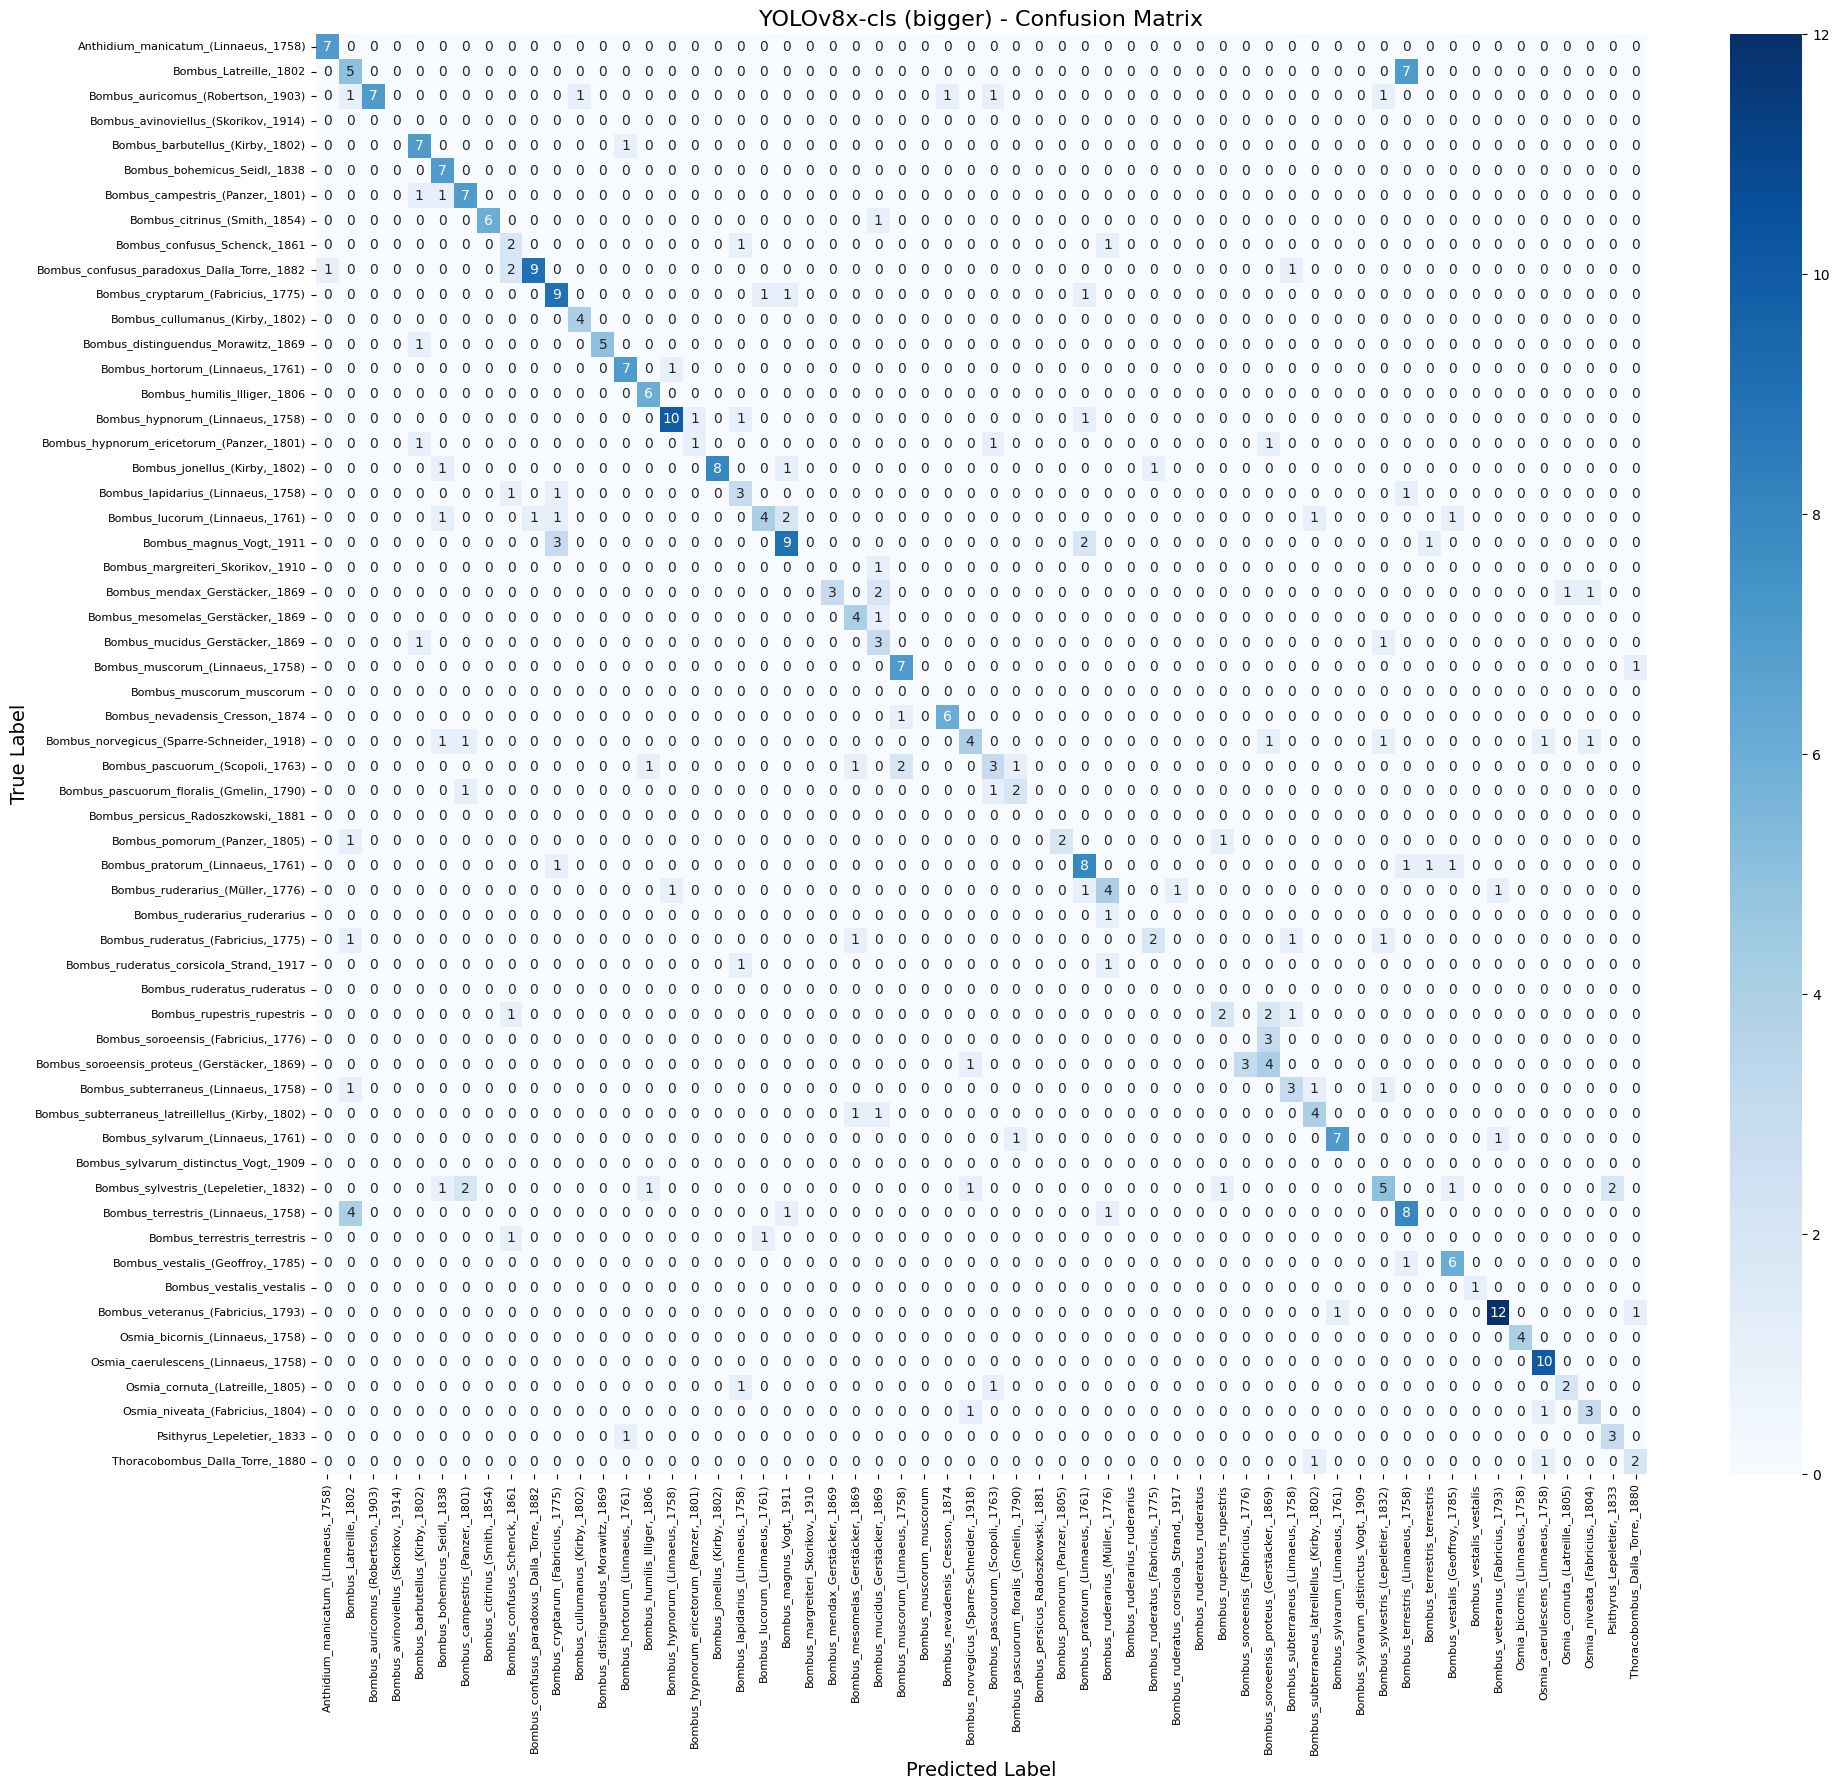

In [32]:
# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred, labels=list(range(len(class_names))))

plt.figure(figsize=(20, 18))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names, cbar=True)
plt.title(f"{model_name} - Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

Showing misclassified examples:


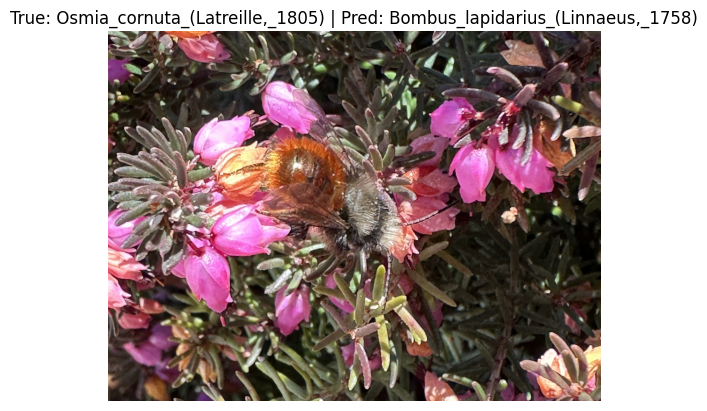

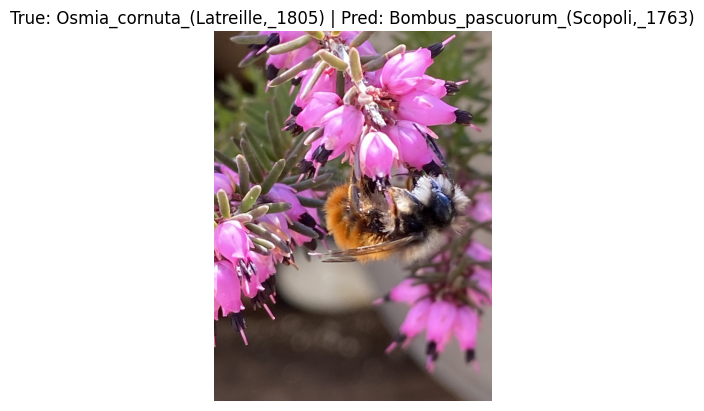

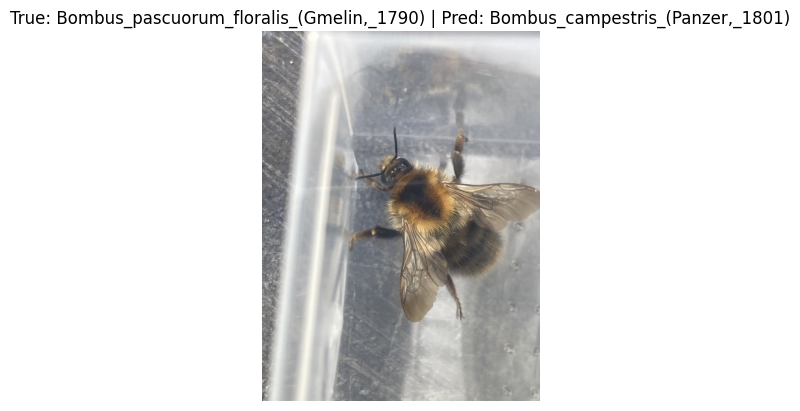

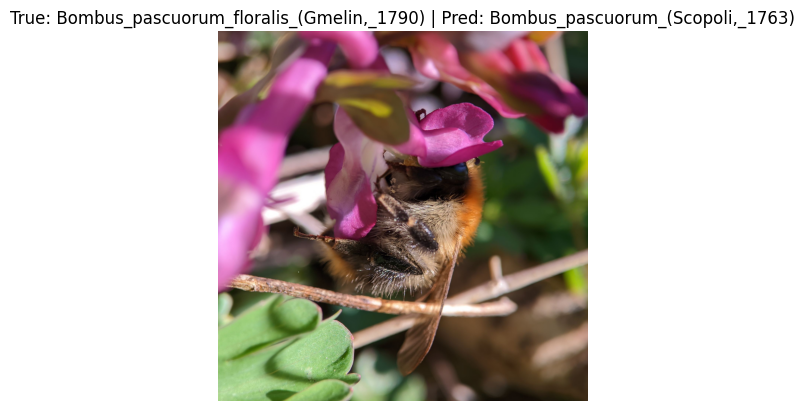

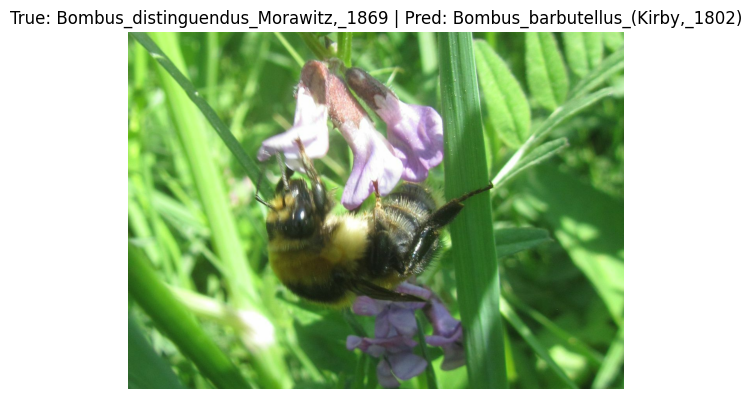

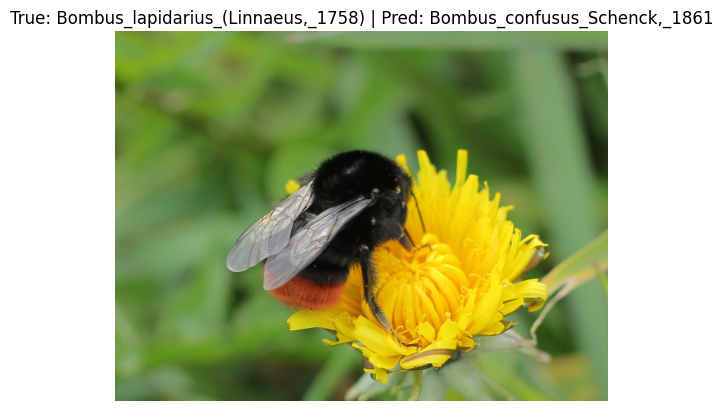

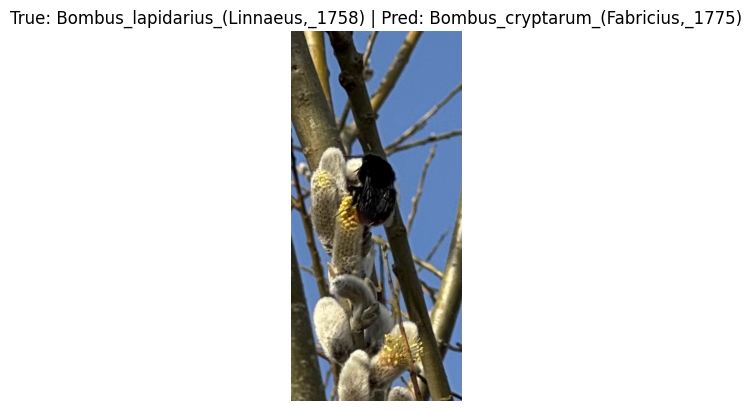

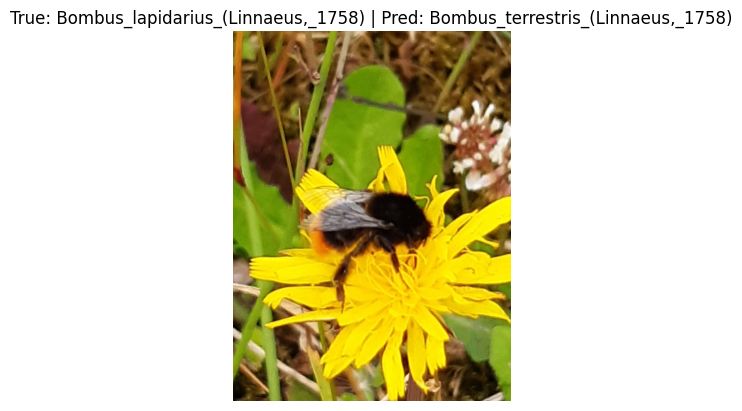

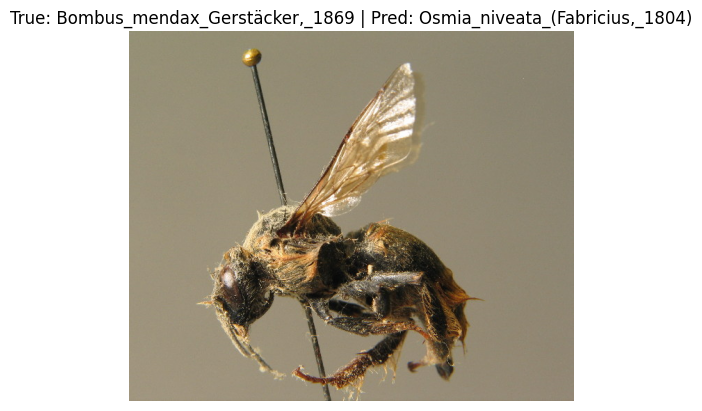

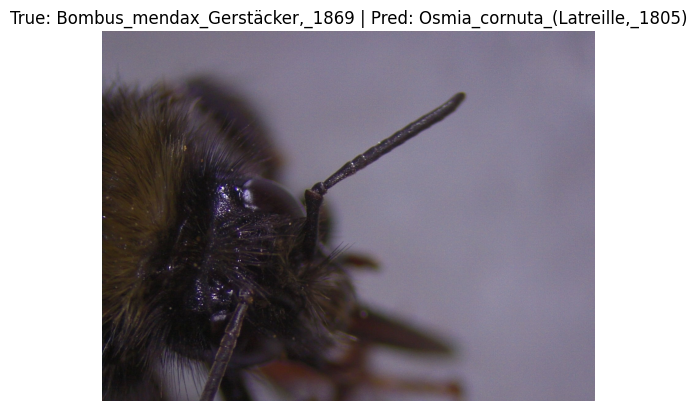

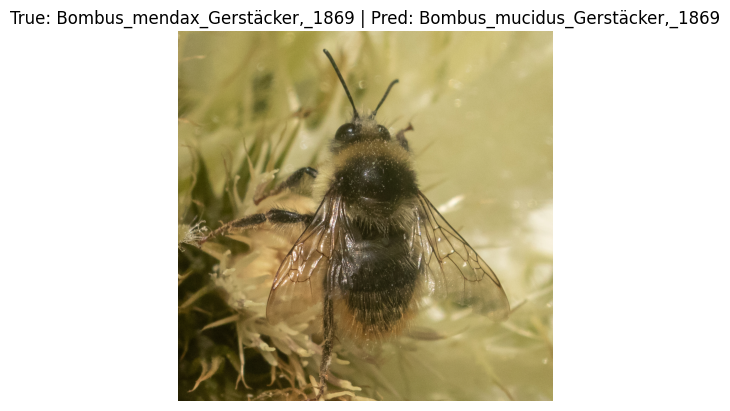

KeyboardInterrupt: 

In [33]:
# Optional: show a few misclassified images
show_misclassified = True
if show_misclassified:
    print("Showing misclassified examples:")
    for i, img_path in enumerate(image_paths):
        if y_true[i] != y_pred[i]:
            img = Image.open(img_path)
            plt.imshow(img)
            plt.title(f"True: {class_names[y_true[i]]} | Pred: {class_names[y_pred[i]]}")
            plt.axis('off')
            plt.show()